# Customer activity: analysis report

### Data dictionary for online customer activity

- **administrative**: Columns which indicates which administrative activity the user was performing on their account.
- **administrative_duration**: How long a user performed administrative tasks in that session.
- **informational**: Indicates which informational activity the user was performing on the website.
- **informational_duration**: How long a users performed informational tasks in seconds during that session.
- **product_related**: Indicates which product the user was viewing on the website.
- **product_related_duration**: How long a user browsed products during that session. 
- **bounce_rates**: Historical bounce rate of that particular page for all users. They visited the directly and immediately exited. - This column has been dropped. Heavily correlated with 'exit_rates'.
- **exit_rates**: Historical exit rate of the users from that particular page. 
- **page_values**: The average value contribution of a page to a customer sale
- **month**: Month the users activity took place
- **operating_systems**: Operating system the user was using
- **browser**: The browser used by the user
- **region**: The region the user originated from
- **traffic_type**: How the user was redirected to the site
- **visitor_type**: Whether a customer was is new/returning or other
- **weekend**: Whether the activity only took place during the weekend
- **revenue**: Whether the customer purchased anything that session

In [1]:
from data_utils import DataTransform, DataFrameInfo, Plotter, StatisticalTests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_activity_df = pd.read_csv('preprocessed_data.csv')
customer_activity_skewed = pd.read_csv('preprocessed_skewed_data.csv')
customer_activity_df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
transformer = DataTransform(customer_activity_df)
customer_activity_df = transformer.convert_columns(['administrative','informational','product_related'],'int')
#customer_activity_df = transformer.convert_columns(['operating_systems','browser','region','traffic_type','visitor_type'],'categorical')
customer_activity_df = transformer.convert_columns(['month'],'date')
customer_activity_df.dtypes

administrative                       int64
administrative_duration            float64
informational                        int64
informational_duration             float64
product_related                      int64
product_related_duration           float64
exit_rates                         float64
page_values                        float64
month                       datetime64[ns]
operating_systems                   object
browser                             object
region                              object
traffic_type                        object
visitor_type                        object
weekend                              int64
revenue                              int64
dtype: object

## Task 1: What are our customers doing?

### ***Are sales proportionally happening more on weekends?***

In [4]:
sales_weekends_df = customer_activity_df.iloc[:,-2:]
weekend_effect = sales_weekends_df.groupby(['weekend']).sum()
total_sales = sales_weekends_df['revenue'].sum()
print(total_sales)
weekend_effect['proportion_sales_percentage'] = (weekend_effect['revenue']/total_sales) * 100
weekend_effect.head()

1896


,revenue,proportion_sales_percentage
weekend,,
0,1465,77.267932
1,431,22.732068


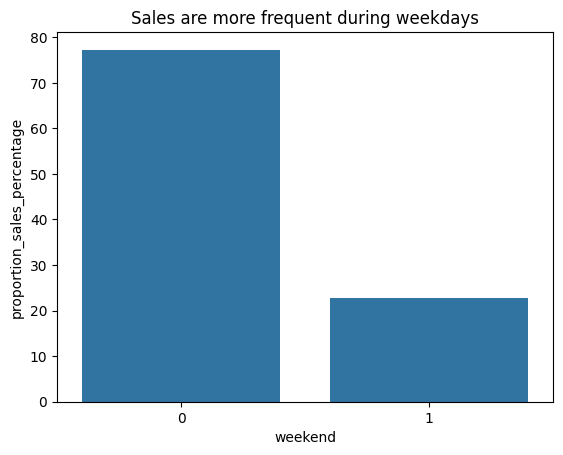

In [5]:
sns.barplot(x=weekend_effect.index, y=weekend_effect['proportion_sales_percentage'])
plt.title('Sales are more frequent during weekdays')
plt.show()

In [6]:
info_extractor = DataFrameInfo(customer_activity_df)
region_sales = info_extractor._get_slice(['region','revenue'])
region_sales = region_sales.groupby(['region'],as_index=False).sum()
region_sales

,region,revenue
0,Africa,130
1,Asia,187
2,Eastern Europe,194
3,North America,750
4,Northern Africa,82
5,Oceania,51
6,South America,130
7,Southern Africa,49
8,Western Europe,323


In [7]:
region_sales.at[4,'region'] = 'Africa'
region_sales.at[7,'region'] = 'Africa'
region_sales = region_sales.groupby(['region']).sum()
region_sales['proportion_sales_percentage'] = (region_sales['revenue']/total_sales) * 100
region_sales

,revenue,proportion_sales_percentage
region,,
Africa,261,13.765823
Asia,187,9.862869
Eastern Europe,194,10.232068
North America,750,39.556962
Oceania,51,2.689873
South America,130,6.856540
Western Europe,323,17.035865


/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/996566281.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  rs.set_xticklabels(rs.get_xticklabels(), rotation=90)


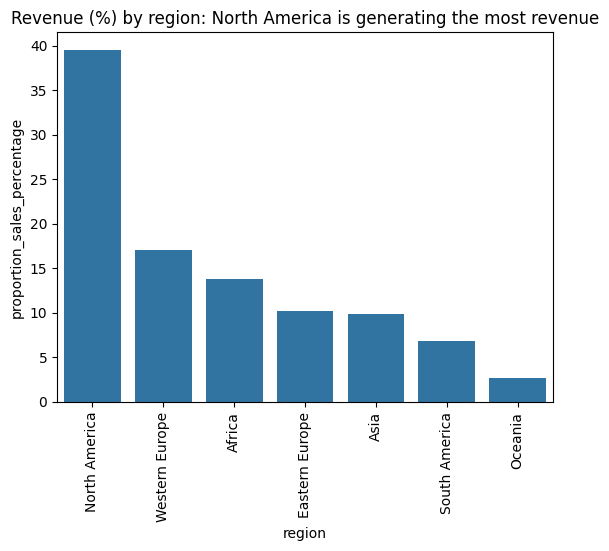

In [8]:
order = region_sales.sort_values(by='proportion_sales_percentage', ascending=False).index
rs = sns.barplot(x=region_sales.index, y=region_sales['proportion_sales_percentage'], order=order)
plt.title('Revenue (%) by region: North America is generating the most revenue')
rs.set_xticklabels(rs.get_xticklabels(), rotation=90)
plt.show()

### ***Is there any particular website traffic that stands out when generating sales?***

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/1205812491.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  wt.set_xticklabels(wt.get_xticklabels(), rotation=90)


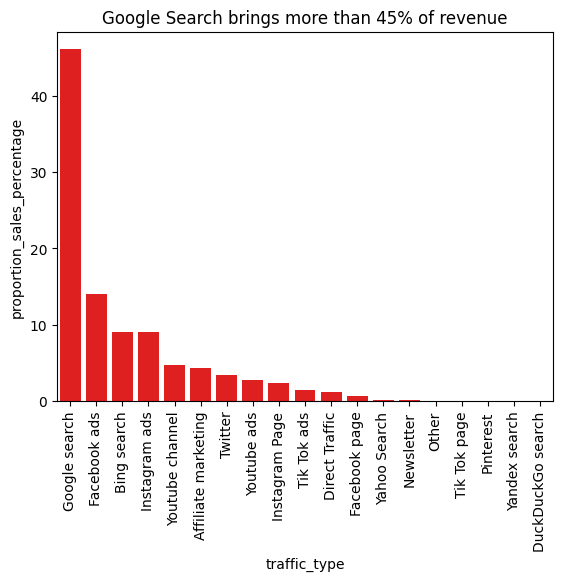

In [9]:
website_traffic = info_extractor._get_slice(['traffic_type','revenue'])
website_traffic = website_traffic.groupby(['traffic_type']).sum()
website_traffic['proportion_sales_percentage'] = (website_traffic['revenue']/total_sales) * 100
order_w = website_traffic.sort_values(by='proportion_sales_percentage', ascending=False).index
wt = sns.barplot(x=website_traffic.index, y=website_traffic['proportion_sales_percentage'], order =order_w, color='r')
plt.title('Google Search brings more than 45% of revenue')
wt.set_xticklabels(wt.get_xticklabels(), rotation=90)
plt.show()

### ***What percentage of time is spent on the website performing administrative/product or informational related tasks?***

In [10]:
info_extractor_2 = DataFrameInfo(customer_activity_skewed)
admin_task = info_extractor_2._get_slice(['administrative','administrative_duration'])
product_related_task = info_extractor_2._get_slice(['product_related','product_related_duration'])
informational_task = info_extractor_2._get_slice(['informational','informational_duration'])
combined = info_extractor_2._get_slice(['administrative_duration','informational_duration','product_related_duration'])
combined.describe()

,administrative_duration,informational_duration,product_related_duration
count,12248.000000,12248.000000,12248.000000
mean,78.851762,33.610024,1185.961708
std,173.431610,134.634181,1756.737333
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,199.000000
50%,6.600000,0.000000,589.000000
75%,86.507355,0.000000,1408.000000
max,2155.000000,1988.750000,23866.000000


In [11]:
max_time_value = 2155
combined['administrative_duration_%'] = (combined['administrative_duration']/max_time_value) * 100
combined['informational_duration_%'] = (combined['informational_duration']/max_time_value) * 100
combined['product_related_duration_%'] = (combined['product_related_duration']/max_time_value) * 100
info_extractor_2 = DataFrameInfo(combined)
combined_2 = info_extractor_2._get_slice(['administrative_duration_%','informational_duration_%','product_related_duration_%'])
combined_2

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/3967056671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['administrative_duration_%'] = (combined['administrative_duration']/max_time_value) * 100
/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/3967056671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['informational_duration_%'] = (combined['informational_duration']/max_time_value) * 100
/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_2

,administrative_duration_%,informational_duration_%,product_related_duration_%
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,40.649652
2,4.612529,0.000000,17.076566
3,0.000000,0.000000,66.450116
4,0.000000,0.000000,32.204176
...,...,...,...
12243,6.218097,5.207425,88.074246
12244,0.306265,0.000000,102.180974
12245,0.000000,0.000000,14.663573
12246,4.547564,0.000000,68.167053


/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/984194305.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  td.set_xticklabels(td.get_xticklabels(), rotation=90)


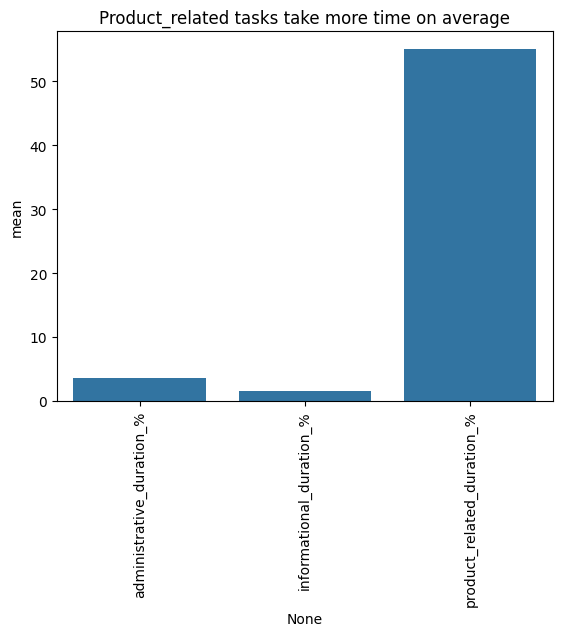

In [12]:
desc = combined_2.describe()
desc_2 = desc.T
desc_2 = desc_2.iloc[:,1:3]
desc_2

td = sns.barplot(x=desc_2.index, y=desc_2['mean'])
plt.title('Product_related tasks take more time on average')
td.set_xticklabels(td.get_xticklabels(), rotation=90)
plt.show()



### ***Are there any informational/administrative tasks which users spend time doing most?***

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/3622874086.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  at.set_xticklabels(at.get_xticklabels(), rotation=90)


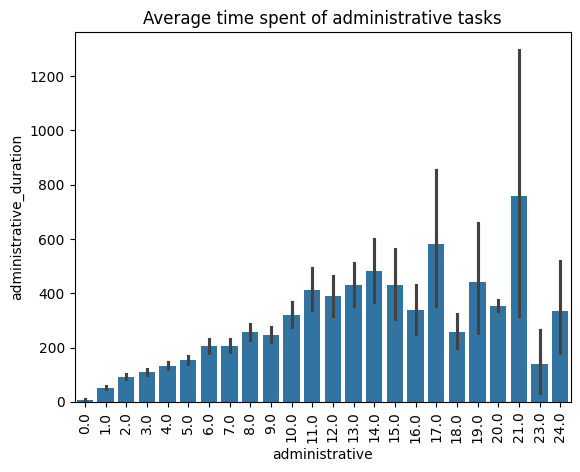

In [14]:
at = sns.barplot(data=admin_task, y="administrative_duration", x="administrative")
plt.title('Average time spent of administrative tasks')
at.set_xticklabels(at.get_xticklabels(), rotation=90)
plt.show()

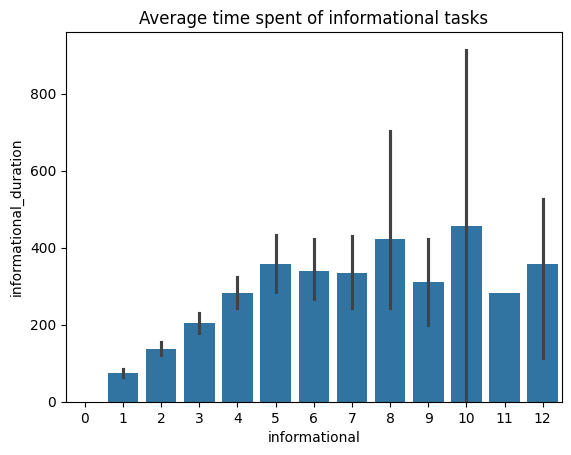

In [15]:
sns.barplot(data=informational_task, y="informational_duration", x="informational")
plt.title('Average time spent of informational tasks')
plt.show()

### ***What is the breakdown of months making the most sales?***

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/675939301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_sales['month'] = month_sales['month'].dt.month


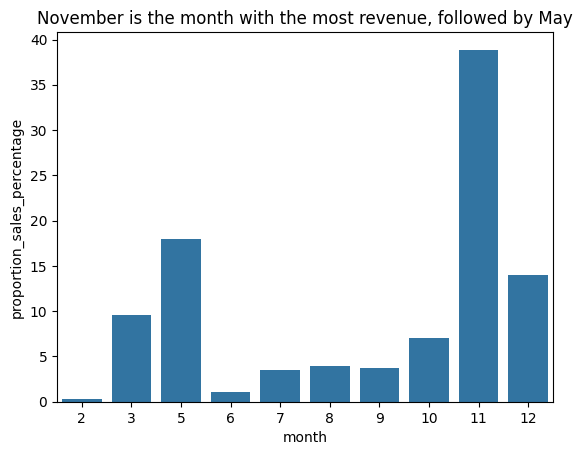

In [16]:
month_sales = info_extractor._get_slice(['month','revenue'])
month_sales['month'] = month_sales['month'].dt.month
month_sales = month_sales.groupby(['month']).sum()
month_sales['proportion_sales_percentage'] = (month_sales['revenue']/total_sales) * 100
sns.barplot(x=month_sales.index, y=month_sales['proportion_sales_percentage'])
plt.title('November is the month with the most revenue, followed by May')
plt.show()


## Task 2: What ***software*** are our customers using the most to access the website?

### ***The count of the operating systems used to visit the site and the percentage of the total***

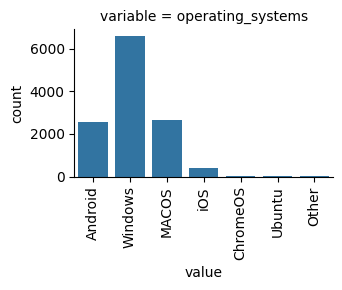

In [37]:
plotter = Plotter(customer_activity_df)
plotter.count_plots_grid(['operating_systems'])

In [46]:
total_entries = len(customer_activity_df['operating_systems'])
os_counts = customer_activity_df.copy()
info_extractor_3 = DataFrameInfo(os_counts)
os_counts = info_extractor_3._get_slice(["operating_systems"])
os_counts['counts'] = 1
os_counts = os_counts.groupby(['operating_systems']).sum()
os_counts["count_%"] = (os_counts['counts'] / total_entries) * 100
os_counts

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_26161/3497598779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_counts['counts'] = 1


,counts,count_%
operating_systems,,
Android,2579,21.056499
ChromeOS,25,0.204115
MACOS,2671,21.807642
Other,7,0.057152
Ubuntu,9,0.073481
Windows,6572,53.657740
iOS,385,3.143370


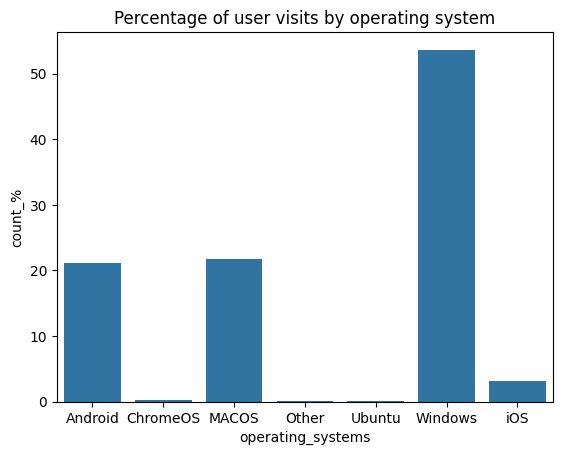

In [48]:
sns.barplot(x=os_counts.index, y=os_counts['count_%'])
plt.title('Percentage of user visits by operating system')
plt.show()


- The amount of users visiting the site using mobile operating system and desktop operating systems
- The most commonly used browsers and their breakdown on mobile versus desktop

Based on this analysis of what are the most popular operating system, are there any regions where there is a discrepancy in what is popular? This could be an indication that users in that region are having technical issues that the tech team might want to investigate.

The company whats to investigate the traffic coming to the website to see if the marketing team can make any improvements to their existing strategy. They would like the following information so that they can make better decisions about what is/isn't working. You are asked to create visualisations of the following data:


- Visualise what traffic is currently generating the most revenue broken down by region
- What traffic has the highest bounce rate? This could indicate that the marketing channels advertisement isn't enticing enough - for the customers. Conversely a low bounce rate can indicate that the strategy is highly effective. Break down this data by region.
- Check what months have generated the most sales from ads traffic